In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_input = pd.read_csv('Input.csv', sep = ';')
df_input = df_input.replace(-999.0000, np.NaN)
df_input.dropna()
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 16 columns):
Well           2460 non-null object
Depth          2460 non-null float64
GR             2460 non-null float64
NPHI           2460 non-null float64
RHOB           2460 non-null float64
PEF            2460 non-null float64
DT             2460 non-null float64
RD_LOG         2460 non-null float64
VSH            2460 non-null float64
SW             2460 non-null float64
KLOGH          2460 non-null float64
PHIF           2460 non-null float64
PHID           2460 non-null float64
N-D            2460 non-null float64
Id_discreto    2460 non-null int64
Lithofacies    2460 non-null object
dtypes: float64(13), int64(1), object(2)
memory usage: 307.6+ KB


## K-means

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
var = df_input.values
clu_var = var[:, [2, 5, 6, 7, 10]].astype('int')
clu_var.shape

(2460, 5)

### Elbow method

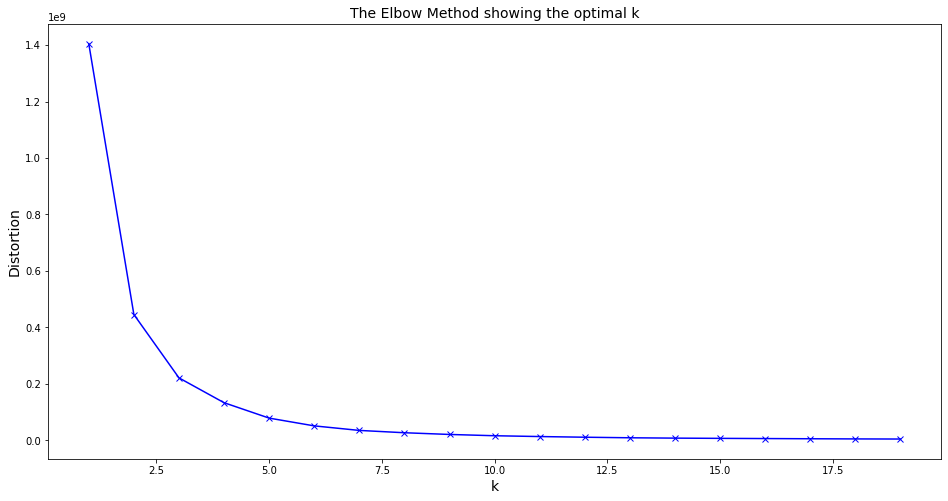

In [5]:
distortions = []

K = range(1,20)

for k in K:
    kmean_model = KMeans(n_clusters=k)
    kmean_model.fit(clu_var)
    distortions.append(kmean_model.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k', fontsize = 14)
plt.ylabel('Distortion', fontsize = 14)
plt.title('The Elbow Method showing the optimal k', fontsize = 14)
plt.savefig('Elvow.png',dpi=600)
plt.show()

### Silhouette method

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 5 The average silhouette_score is : 0.32080268984780186
For n_clusters = 6 The average silhouette_score is : 0.3189509178138973
For n_clusters = 7 The average silhouette_score is : 0.3278668178669738
For n_clusters = 8 The average silhouette_score is : 0.3376846333562895
For n_clusters = 9 The average silhouette_score is : 0.31330344438226315
For n_clusters = 10 The average silhouette_score is : 0.31820348301725226


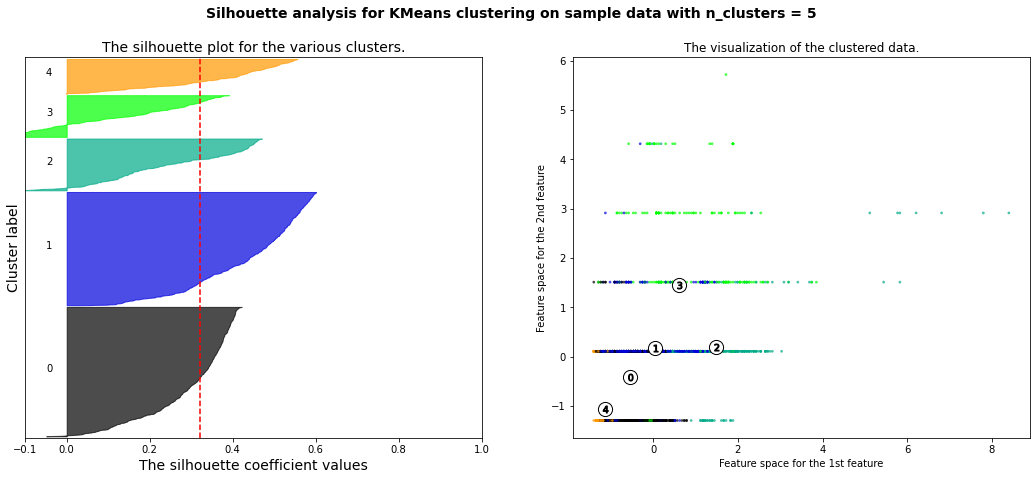

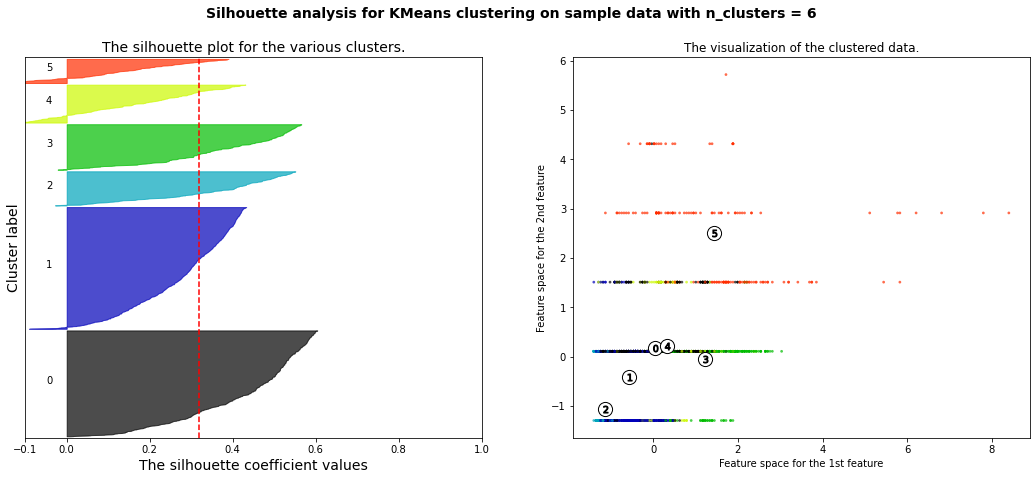

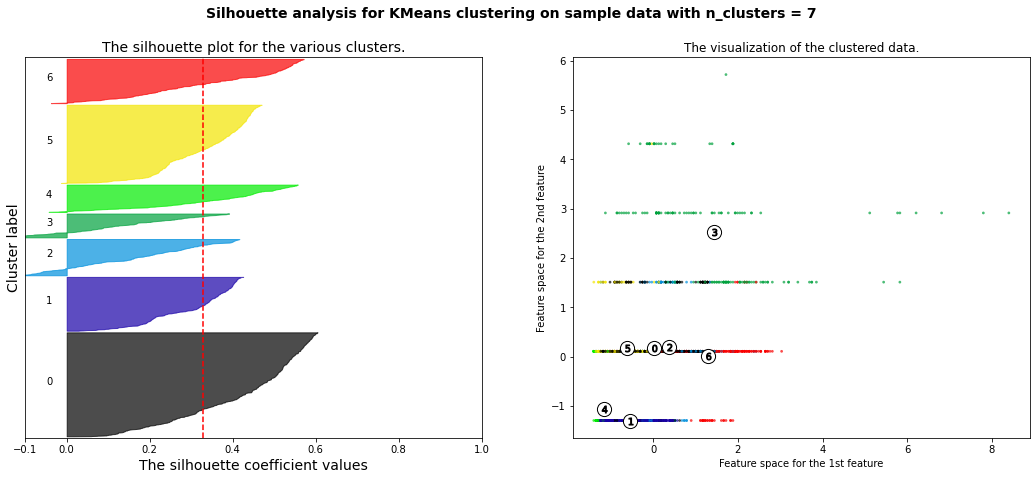

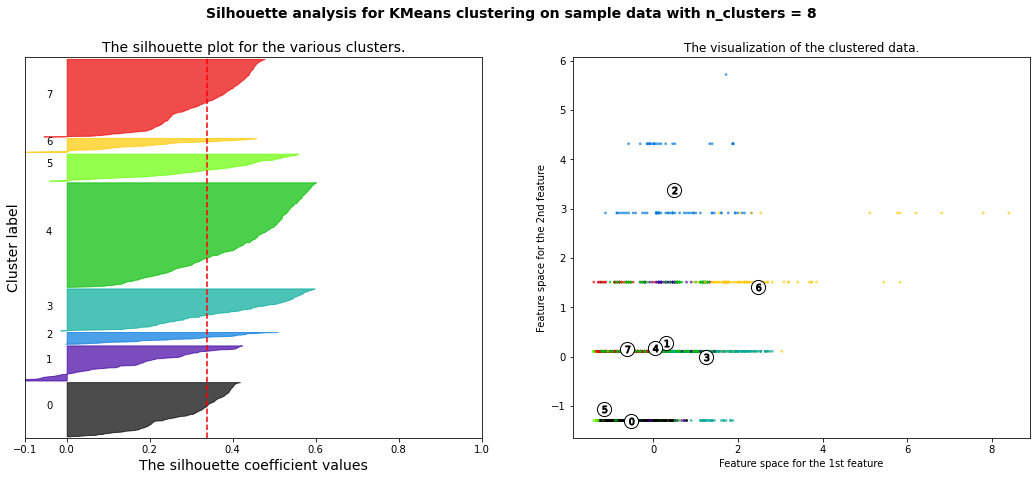

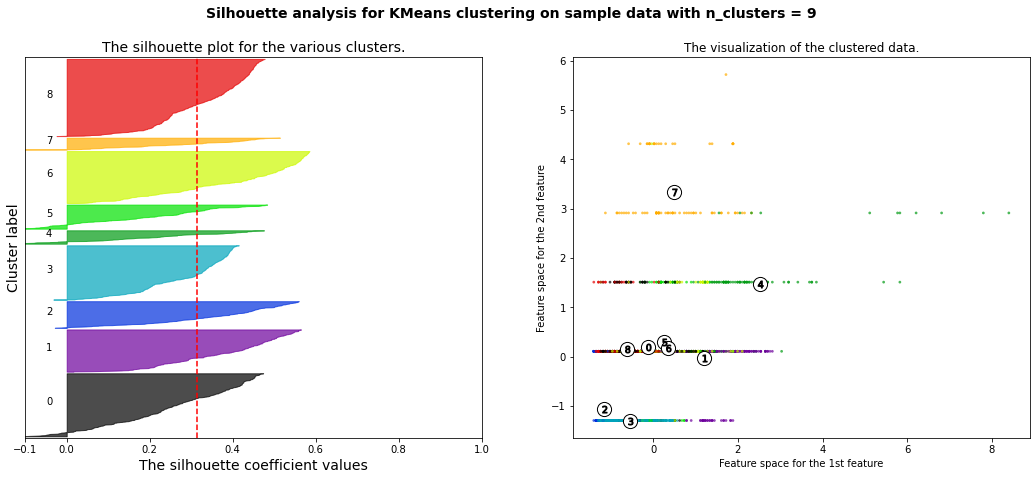

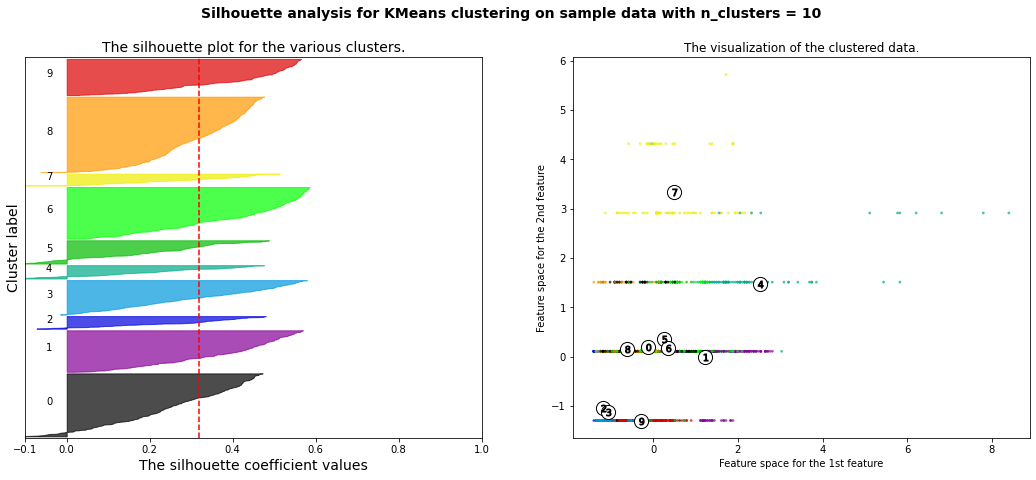

In [7]:
range_n_clusters = [5, 6, 7, 8, 9, 10]
kmeans_scaler = StandardScaler()
Var_scaled = kmeans_scaler.fit_transform(clu_var)

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(Var_scaled) + (n_clusters + 1) * 10])

    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Var_scaled)

    
    silhouette_avg = silhouette_score(Var_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


    sample_silhouette_values = silhouette_samples(Var_scaled, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.", fontsize=14)
    ax1.set_xlabel("The silhouette coefficient values", fontsize=14)
    ax1.set_ylabel("Cluster label", fontsize=14)

    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Var_scaled[:, 0], Var_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Number optimal of clusters:** k=8

In [8]:
# Standarization
kmeans_scaler = StandardScaler()
Var_scaled = kmeans_scaler.fit_transform(clu_var)
#K-means
k_means = KMeans(n_clusters = 8, max_iter = 600, algorithm = 'auto')
predicted_kmeans = k_means.fit_predict(Var_scaled)

In [9]:
df_input.insert(loc= 14, column='Cluster_all', value = predicted_kmeans)
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 17 columns):
Well           2460 non-null object
Depth          2460 non-null float64
GR             2460 non-null float64
NPHI           2460 non-null float64
RHOB           2460 non-null float64
PEF            2460 non-null float64
DT             2460 non-null float64
RD_LOG         2460 non-null float64
VSH            2460 non-null float64
SW             2460 non-null float64
KLOGH          2460 non-null float64
PHIF           2460 non-null float64
PHID           2460 non-null float64
N-D            2460 non-null float64
Cluster_all    2460 non-null int32
Id_discreto    2460 non-null int64
Lithofacies    2460 non-null object
dtypes: float64(13), int32(1), int64(1), object(2)
memory usage: 317.2+ KB


## Principal Component Analysis (PCA)

In [11]:
from sklearn.decomposition import PCA

In [10]:
var_1 = df_input.iloc[:, [2, 3, 4, 6]]
var_2 = df_input.iloc[:, [5, 7, 10]]
scaler_1 = StandardScaler().fit(var_1.values)
var_1s = scaler_1.transform(var_1.values)
scaler_2 = StandardScaler().fit(var_2.values)
var_2s = scaler_2.transform(var_2.values)

In [12]:
model_pca = PCA(n_components = 1)
pca_1 = model_pca.fit_transform(var_1s)
pca_2 = model_pca.fit_transform(var_2s)

In [13]:
df_input.insert(loc= 15, column='PCA_1', value = pca_1)
df_input.insert(loc=16, column = 'PCA_2', value = pca_2)

In [14]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 19 columns):
Well           2460 non-null object
Depth          2460 non-null float64
GR             2460 non-null float64
NPHI           2460 non-null float64
RHOB           2460 non-null float64
PEF            2460 non-null float64
DT             2460 non-null float64
RD_LOG         2460 non-null float64
VSH            2460 non-null float64
SW             2460 non-null float64
KLOGH          2460 non-null float64
PHIF           2460 non-null float64
PHID           2460 non-null float64
N-D            2460 non-null float64
Cluster_all    2460 non-null int32
PCA_1          2460 non-null float64
PCA_2          2460 non-null float64
Id_discreto    2460 non-null int64
Lithofacies    2460 non-null object
dtypes: float64(15), int32(1), int64(1), object(2)
memory usage: 355.7+ KB


In [15]:
df_input.to_excel('Results.xlsx', index = False)
df_input.to_csv('Results.csv', index = False)